In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import missingno as msno

/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train_csv = pd.read_csv('train.csv')#read in titanic information

In [4]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


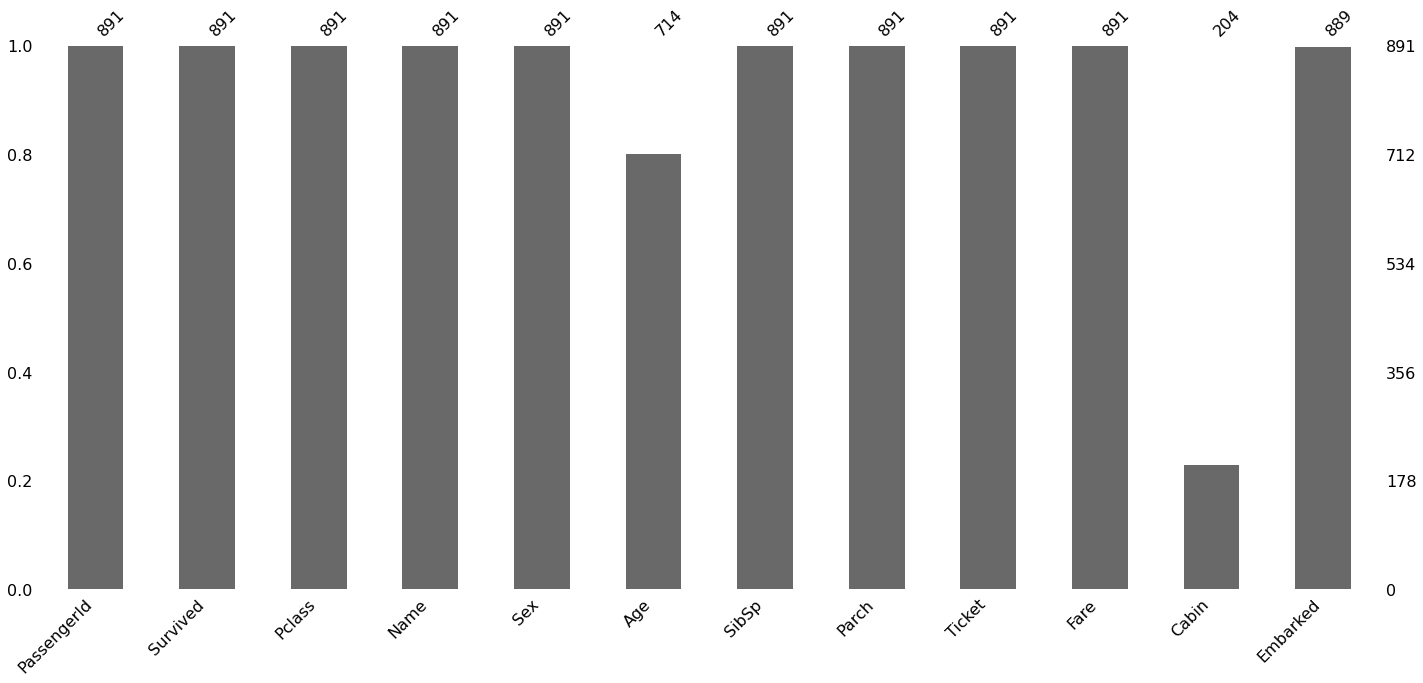

In [5]:
msno.bar(train_csv)# plot missing values by column


* Cabin has 687 missing values
* Embarked has 2 missing values
* Age has 177 missing values

In [6]:
train_csv.dropna(subset=['Embarked'],inplace=True)

In [7]:
train_csv['Embarked'].shape# Dropped Embarked values that = nan

(889,)

In [8]:
train_csv['Cabin'].fillna('**¯\\_(ツ)_/¯**', inplace=True)

In [9]:
train_csv.isna().sum()# Cabin Values changed

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [10]:
train_csv['family_count'] = (train_csv['SibSp'] + train_csv['Parch'])# Creates new column that adds fam member columns together

In [11]:
train_csv['is_reverend'] = train_csv['Name'].str.contains('Rev')# contains title reverend yes or no

In [12]:
# creates dummie for is_reverend
embarked = pd.get_dummies(train_csv['Embarked'])# creates dummie for C,Q,S outcomes in embarked column



In [13]:
train_csv_final = pd.concat([train_csv, embarked], axis=1)# puts all columns back together

In [14]:
train_csv_final = train_csv_final.rename(columns ={'C':'Embarked_C','Q':'Embarked_Q','S':'Embarked_S'})# renamed dummie columns

In [15]:
train_csv_final[["is_reverend"]] *= 1 # Change Isreverand to boolean values



In [16]:
sex = pd.get_dummies(train_csv['Sex'])# Creates dummies for sex column


In [17]:
train_csv_final = pd.concat([train_csv_final, sex], axis=1)# combines sex back into dataframe

In [18]:
train_csv_final['Survived'].value_counts()# checked how many survived

0    549
1    340
Name: Survived, dtype: int64

In [19]:
train_csv_final['female'].value_counts()

0    577
1    312
Name: female, dtype: int64

312 Females on the boat

In [20]:
train_csv_final['male'].value_counts()

1    577
0    312
Name: male, dtype: int64

577 males on the boat

The overall survival rate was 340/891 or 38.2%

In [21]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['female'] ==1 )].sum()


PassengerId                                                 99228
Survived                                                      231
Pclass                                                        445
Name            Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex             femalefemalefemalefemalefemalefemalefemalefema...
Age                                                          5583
SibSp                                                         120
Parch                                                         120
Ticket          PC 17599STON/O2. 3101282113803347742237736PP 9...
Fare                                                      11941.7
Cabin           C85**¯\_(ツ)_/¯**C123**¯\_(ツ)_/¯****¯\_(ツ)_/¯**...
Embarked        CSSSCSSSCQSQCQCCQQCSSSSSSQSSSSSQSCSSSSSQSSSSQS...
family_count                                                  240
is_reverend                                                     0
Embarked_C                                                     64
Embarked_Q

Female Survival rate = 231/312 = 74.0%

In [22]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['male'] ==1 )].sum()


PassengerId                                                 51854
Survived                                                      109
Pclass                                                        220
Name            Williams, Mr. Charles EugeneBeesley, Mr. Lawre...
Sex             malemalemalemalemalemalemalemalemalemalemalema...
Age                                                       2536.67
SibSp                                                          42
Parch                                                          39
Ticket          2443732486981137882677199472661160124873834577...
Fare                                                      4449.54
Cabin           **¯\_(ツ)_/¯**D56A6**¯\_(ツ)_/¯**C52**¯\_(ツ)_/¯*...
Embarked        SSSCSCSSSCSCSSSSSSSCCSSSSSSSSSSSQSSSSCSSSSSSSS...
family_count                                                   81
is_reverend                                                     0
Embarked_C                                                     29
Embarked_Q

109/577 = 18.89% male survival rate

In [23]:
train_csv_final['Pclass'].value_counts()# check counts for each class

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [24]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Pclass'] ==1 )].sum()# Survival for 1st class

PassengerId                                                 65989
Survived                                                      134
Pclass                                                        134
Name            Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex             femalefemalefemalemalefemalefemalemalefemalema...
Age                                                       4214.92
SibSp                                                          67
Parch                                                          53
Ticket          PC 17599113803113783113788PC 17569PC 175721994...
Fare                                                      12842.7
Cabin           C85C123C103A6B78D33C52C23 C25 C27D10 D12D47C2E...
Embarked        CSSSCCSSCSSSSCCCCCSSSCSCSSSSCSCSCCCCCSCCCSCSSC...
family_count                                                  120
is_reverend                                                     0
Embarked_C                                                     59
Embarked_Q

1st class survival rate 134/214 = 62.6%

In [25]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Pclass'] ==2)].sum()

PassengerId                                                 38200
Survived                                                       87
Pclass                                                        174
Name            Nasser, Mrs. Nicholas (Adele Achem)Hewlett, Mr...
Sex             femalefemalemalemalefemalefemalefemalefemalefe...
Age                                                       2149.83
SibSp                                                          43
Parch                                                          56
Ticket          237736248706244373248698SC/Paris 21232926C.A. ...
Fare                                                      1918.85
Cabin           **¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_(ツ)_/¯**D56**¯\...
Embarked        CSSSCSSSSSSSSSSSSSSSSSSSSQSQSSSSSSCSSSSSSSSSSS...
family_count                                                   99
is_reverend                                                     0
Embarked_C                                                      9
Embarked_Q

2nd class survival rate 87/184 = 47.3%

In [26]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Pclass'] ==3)].sum()

PassengerId                                                 46893
Survived                                                      119
Pclass                                                        357
Name            Heikkinen, Miss. LainaJohnson, Mrs. Oscar W (E...
Sex             femalefemalefemalefemalefemalefemalefemalefema...
Age                                                       1754.92
SibSp                                                          52
Parch                                                          50
Ticket          STON/O2. 3101282347742PP 954926493309233470773...
Fare                                                      1629.69
Cabin           **¯\_(ツ)_/¯****¯\_(ツ)_/¯**G6**¯\_(ツ)_/¯****¯\_...
Embarked        SSSCQSQQCCQQCSSSSQSSSQCSCSSSQSSSQSQSCQSSSQCSSS...
family_count                                                  102
is_reverend                                                     0
Embarked_C                                                     25
Embarked_Q

3rd class survival rate 24.2% (Leonardo di Caprio didnt have a chance)


In [27]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['is_reverend'] ==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_count,is_reverend,Embarked_C,Embarked_Q,Embarked_S,female,male


No Reverends Survived

In [28]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Cabin'] == '**¯\\_(ツ)_/¯**')].sum()

PassengerId                                                 87383
Survived                                                      206
Pclass                                                        506
Name            Heikkinen, Miss. LainaJohnson, Mrs. Oscar W (E...
Sex             femalefemalefemalefemalemalefemalefemalefemale...
Age                                                       4072.25
SibSp                                                          94
Parch                                                          97
Ticket          STON/O2. 3101282347742237736248706244373264933...
Fare                                                      5280.34
Cabin           **¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_(ツ...
Embarked        SSCSSCQSQQCCCQQSSSCSSSSSQSSSSSQCSSSSSQSSSSQSSS...
family_count                                                  191
is_reverend                                                     0
Embarked_C                                                     41
Embarked_Q

In [29]:
train_csv_final['Cabin'].value_counts()

**¯\_(ツ)_/¯**    687
G6                 4
C23 C25 C27        4
B96 B98            4
E101               3
                ... 
A19                1
B102               1
F G63              1
A32                1
D15                1
Name: Cabin, Length: 147, dtype: int64

206/687 = 30% Survival rate for Cabins marked '**¯\\_(ツ)_/¯**'

In [30]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Age'] == 'nan')].sum()

/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin           0.0
Embarked        0.0
family_count    0.0
is_reverend     0.0
Embarked_C      0.0
Embarked_Q      0.0
Embarked_S      0.0
female          0.0
male            0.0
dtype: float64

Survival Rate for missing Age is 0%

In [31]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Embarked_C'] == 1)].sum()

PassengerId                                                 44081
Survived                                                       93
Pclass                                                        152
Name            Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex             femalefemalefemalefemalemalefemalefemalefemale...
Age                                                       2288.92
SibSp                                                          46
Parch                                                          42
Ticket          PC 175992377362649PC 1756926772651SC/Paris 212...
Fare                                                      7414.05
Cabin           C85**¯\_(ツ)_/¯****¯\_(ツ)_/¯**B78**¯\_(ツ)_/¯***...
Embarked        CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
family_count                                                   88
is_reverend                                                     0
Embarked_C                                                     93
Embarked_Q

In [32]:
train_csv_final['Embarked_Q'].value_counts()

0    812
1     77
Name: Embarked_Q, dtype: int64

Embarked Cherbourg Survival Rate 93/168 = 55.35%

In [33]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Embarked_Q'] == 1)].sum()

PassengerId                                                  9599
Survived                                                       30
Pclass                                                         86
Name            McGowan, Miss. Anna "Annie"O'Dwyer, Miss. Elle...
Sex             femalefemalefemalefemalefemalefemalefemalefema...
Age                                                           180
SibSp                                                           9
Parch                                                           0
Ticket          3309233309593356773309581431133093237111035851...
Fare                                                      395.467
Cabin           **¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_(ツ...
Embarked                           QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
family_count                                                    9
is_reverend                                                     0
Embarked_C                                                      0
Embarked_Q

Embarked Queenstown 30/77 - 39.0% Survival Rate

In [34]:
train_csv_final['Embarked_S'].value_counts()

1    644
0    245
Name: Embarked_S, dtype: int64

In [35]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Embarked_S'] == 1)].sum()

PassengerId                                                 97402
Survived                                                      217
Pclass                                                        427
Name            Heikkinen, Miss. LainaFutrelle, Mrs. Jacques H...
Sex             femalefemalefemalefemalefemalefemalemalemalema...
Age                                                       5650.75
SibSp                                                         107
Parch                                                         117
Ticket          STON/O2. 3101282113803347742PP 954911378324870...
Fare                                                      8581.72
Cabin           **¯\_(ツ)_/¯**C123**¯\_(ツ)_/¯**G6C103**¯\_(ツ)_/...
Embarked        SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...
family_count                                                  224
is_reverend                                                     0
Embarked_C                                                      0
Embarked_Q

Embarked Southhampton Survival Rate 217/644  = 33.7%

In [36]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Age'] <= 12)].sum() #Child survivers on the boat

PassengerId                                                 18333
Survived                                                       40
Pclass                                                         97
Name            Sandstrom, Miss. Marguerite RutLaroche, Miss. ...
Sex             femalefemalefemalemalemalemalefemalemalefemale...
Age                                                        155.17
SibSp                                                          37
Parch                                                          53
Ticket          PP 9549SC/Paris 2123C.A. 346512487382651363291...
Fare                                                      1182.59
Cabin           G6**¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_...
Embarked                 SCSSCSSSSSSSSSSSCSSCCSSSSSSCCSSSSSSSCCSS
family_count                                                   90
is_reverend                                                     0
Embarked_C                                                      9
Embarked_Q

Children 12 or under Survival Rate= 40/69 58%

In [37]:
children  = train_csv_final[(train_csv_final['Age'] <= 12)]# Chidlren under 12 on the boat

children.count()

PassengerId     69
Survived        69
Pclass          69
Name            69
Sex             69
Age             69
SibSp           69
Parch           69
Ticket          69
Fare            69
Cabin           69
Embarked        69
family_count    69
is_reverend     69
Embarked_C      69
Embarked_Q      69
Embarked_S      69
female          69
male            69
dtype: int64

In [38]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['Age'] <= 12) & (train_csv_final['Pclass'] == 1) ].sum() #1strd class child survivers

PassengerId                                                  1555
Survived                                                        3
Pclass                                                          3
Name            Allison, Master. Hudson TrevorDodge, Master. W...
Sex                                                  malemalemale
Age                                                         15.92
SibSp                                                           2
Parch                                                           6
Ticket                                          11378133638113760
Fare                                                      353.408
Cabin                                           C22 C26A34B96 B98
Embarked                                                      SSS
family_count                                                    8
is_reverend                                                     0
Embarked_C                                                      0
Embarked_Q

1st Class Child Survival Rate 3/4 = 75%

In [39]:
train_csv_final[ (train_csv_final['Age'] <= 12) & (train_csv_final['Pclass'] == 3) ].sum() #3rd class child survivers

PassengerId                                                 20314
Survived                                                       20
Pclass                                                        144
Name            Palsson, Master. Gosta LeonardSandstrom, Miss....
Sex             malefemalemalefemalemalemalemalefemalemalefema...
Age                                                        251.92
SibSp                                                         112
Parch                                                          66
Ticket          349909PP 95493826523499093101295CA 21443470883...
Fare                                                      1182.47
Cabin           **¯\_(ツ)_/¯**G6**¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_...
Embarked         SSQSSSSSCSSSQSSSSSSQSSCSSCCSSSSSSSCCCSSQSCSSSSCS
family_count                                                  178
is_reverend                                                     0
Embarked_C                                                      9
Embarked_Q

Second Class Child Survival Rate 50%

3rd Class Child Survival Rate 13.8%

In [40]:
train_csv_final[ (train_csv_final['Survived'] == 1) & (train_csv_final['Name'].str.contains ('Captain')) ]# Checking for survivers with Capt in thier name

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_count,is_reverend,Embarked_C,Embarked_Q,Embarked_S,female,male


* No one with Captain in their name survived
* Captain Edward Gifford Crosby was on the did not survive but accoring to the internet the real Captain was named Edward J Smith

In [41]:
train_csv_final[(train_csv_final['Name'].str.contains ('Capt')) ]# Checking for people on the boat with Captain in their name

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_count,is_reverend,Embarked_C,Embarked_Q,Embarked_S,female,male
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1


In [42]:
train_csv_final[ (train_csv_final['Survived'] == 0) & (train_csv_final['Fare']) ].max()

PassengerId                             891
Survived                                  0
Pclass                                    3
Name            van Melkebeke, Mr. Philemon
Sex                                    male
Age                                      74
SibSp                                     8
Parch                                     6
Ticket                            WE/P 5735
Fare                                    263
Cabin                                     T
Embarked                                  S
family_count                             10
is_reverend                               1
Embarked_C                                1
Embarked_Q                                1
Embarked_S                                1
female                                    1
male                                      1
dtype: object

 Mr. Philemon van Melkebeke had a ticket costing 263£ making him the holder of the most expensive ticket among non-survivers. 

In [43]:
train_csv_final['Fare'].sort_values(ascending=False)

258    512.3292
679    512.3292
737    512.3292
88     263.0000
341    263.0000
         ...   
277      0.0000
633      0.0000
302      0.0000
597      0.0000
271      0.0000
Name: Fare, Length: 889, dtype: float64

In [44]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['family_count'] == 0)].sum()

PassengerId                                                 69243
Survived                                                      161
Pclass                                                        335
Name            Heikkinen, Miss. LainaBonnell, Miss. Elizabeth...
Sex             femalefemalefemalemalefemalemalefemalemalefema...
Age                                                        4035.5
SibSp                                                           0
Parch                                                           0
Ticket          STON/O2. 3101282113783248706244373264924869833...
Fare                                                      5963.73
Cabin           **¯\_(ツ)_/¯**C103**¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯...
Embarked        SSSSCSQSQQCQQSSSSSSQSSSSSSSQSSSCCQSCQCSSCSSCSC...
family_count                                                    0
is_reverend                                                     0
Embarked_C                                                     37
Embarked_Q

In [45]:
train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['family_count'] >= 2)].sum()

PassengerId                                                 41055
Survived                                                       90
Pclass                                                        183
Name            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Be...
Sex             femalefemalefemalefemalefemalemalefemalemalefe...
Age                                                       1744.75
SibSp                                                          98
Parch                                                         134
Ticket          347742PP 9549347077SC/Paris 2123C.A. 346512661...
Fare                                                      4849.41
Cabin           **¯\_(ツ)_/¯**G6**¯\_(ツ)_/¯****¯\_(ツ)_/¯****¯\_...
Embarked        SSSCSCSSSSCSSSSSSSSSSCSSQSCSCSSQSSSCSSSSSSSSSC...
family_count                                                  232
is_reverend                                                     0
Embarked_C                                                     22
Embarked_Q

In [46]:
train_csv_final[ (train_csv_final['family_count'] >= 2)].count()

PassengerId     193
Survived        193
Pclass          193
Name            193
Sex             193
Age             171
SibSp           193
Parch           193
Ticket          193
Fare            193
Cabin           193
Embarked        193
family_count    193
is_reverend     193
Embarked_C      193
Embarked_Q      193
Embarked_S      193
female          193
male            193
dtype: int64

Having 2 or more family members 47% chance of survival

179/354 having at 1 or more family member gave you a 50% chance of surviving

161/535 no family gave you a 30% chance

In [47]:
(train_csv_final['family_count'] >= 1).sum()

354

In [48]:
female_survival = train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['female'] ==1 )].sum()
male_survival = train_csv_final[(train_csv_final['Survived'] == 1) & (train_csv_final['male'] ==1 )].sum()

In [49]:
male_survival['Survived']

109

In [50]:
male_survival['Survived']

109

In [51]:
child_survival_by_class = train_csv_final[train_csv_final['Age']<12].groupby('Pclass')['Survived'].sum()


Text(0.5, 1.0, 'Survival Rate By Class For Children')

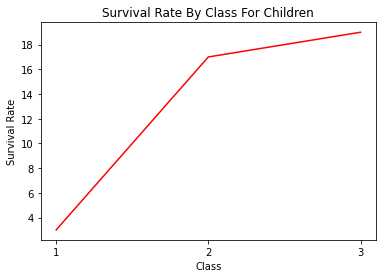

In [52]:
plt.plot(child_survival_by_class,color='r')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks([1,2,3])
plt.title("Survival Rate By Class For Children")

In [53]:
survival_by_gender_female = train_csv_final[train_csv_final['Survived']==1].groupby('female')['Survived'].sum()
survival_by_male= train_csv_final[train_csv_final['Survived']==1].groupby('male')['Survived'].sum()


In [54]:
survival_by_male

male
0    231
1    109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival Rate For Female Passengers')

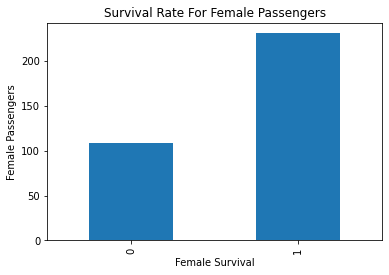

In [70]:
survival_by_gender_female.plot(kind='bar')

plt.xlabel('Female Survival')
plt.ylabel('Female Passengers')
#plt.xticks['Died','Lived']
plt.title('Survival Rate For Female Passengers')

Text(0.5, 1.0, 'Survival Rate For Male Passengers')

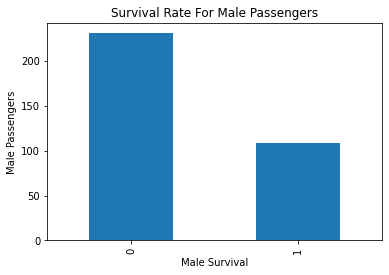

In [71]:
survival_by_male.plot(kind='bar')

plt.xlabel('Male Survival')
plt.ylabel('Male Passengers')
#plt.xticks['Died','Lived']
plt.title('Survival Rate For Male Passengers')

In [103]:
train_csv_final[train_csv_final['Survived']==1].groupby('Age')['Survived'].count()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
58.00    3
60.00    2
62.00    1
63.00    2
80.00    1
Name: Survived, Length: 65, dtype: int64

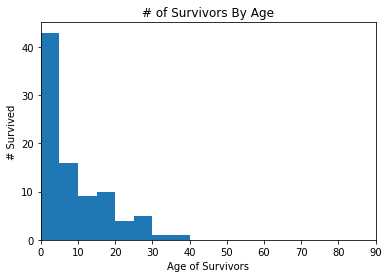

In [127]:
plt.hist(survival_rate_by_age, bins=[0,5,10,15,20,25,30,40,45])  


plt.xlabel('Age of Survivors')
plt.ylabel('# Survived')
plt.xlim(0,80)
plt.title('# of Survivors By Age');
plt.xticks([0,10,20,30,40,50,60,70,80,90]);

In [ ]:
Most of the people who survived were children or under the age 20.

In [115]:
survival_rate_by_age = train_csv_final.groupby('Age')['Survived'].count()

In [116]:
survival_rate_by_age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Survived, Length: 88, dtype: int64